<a href="https://colab.research.google.com/github/chinu1997/Team5-Capstone/blob/main/Chinmaya_Devprasad_Team_5_Capstone_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists...
Building dependency tree...
Reading state information...
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (203 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144786 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing trigge

In [4]:
!pip install -q pyproj==1.9.6

     |████████████████████████████████| 2.8MB 2.8MB/s 


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import folium

In [6]:
working_dir='/content/drive/My Drive/Almabetter/Cohort Aravali/Module 2/Week 1/'
filename=working_dir+'globalterrorismdb_0718dist.csv'
terror_df=pd.read_csv(filename,engine='python')

In [7]:
terror_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
terror_df.shape

(181691, 135)

In [9]:
terror_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [10]:
# Dropping the unnecessary columns which contain max null values
for col in terror_df:
  if terror_df[col].isnull().sum()/len(terror_df)*100 >=60:
    terror_df.drop(col, axis=1,inplace=True)

In [11]:
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 60 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  summary           115562 non-null  object 
 16  crit1             18

In [12]:
terror_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                          'attacktype1_txt':'AttackType','target1':'Target',
                          'nkill':'Killed','nwound':'Wounded','summary':'Summary',
                          'gname':'Group','targtype1_txt':'Target_type',
                          'weaptype1_txt':'Weapon_type'},inplace=True)

In [13]:
terror_df.head()

,eventid,Year,Month,Day,extended,country,Country,region,Region,provstate,city,latitude,longitude,specificity,vicinity,Summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,AttackType,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,natlty1,natlty1_txt,Group,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,0.0,NaN,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,NaN,NaN,13,Unknown,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,1.0,NaN,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


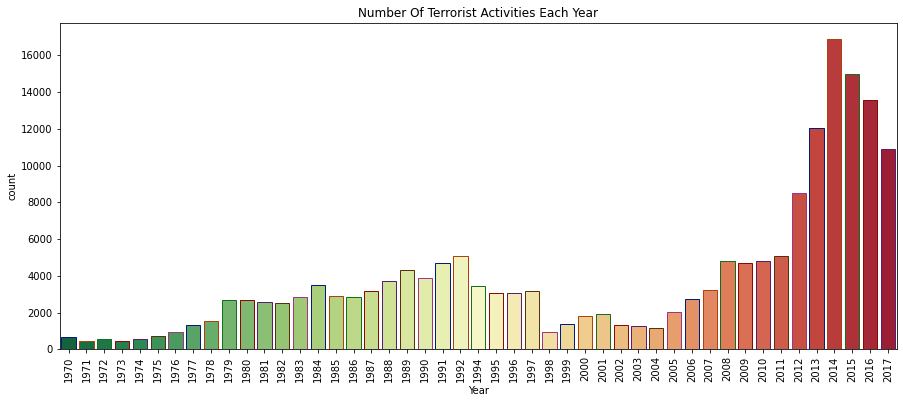

In [14]:

plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror_df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

In [15]:
main=terror_df.success.value_counts()
main

1    161632
0     20059
Name: success, dtype: int64

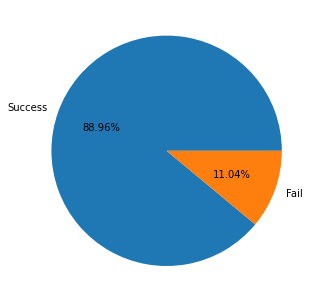

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(main, labels = ['Success','Fail'],autopct='%1.2f%%')
plt.show()

In [17]:
terror_df.AttackType.value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

Text(0, 0.5, 'No of Attack')

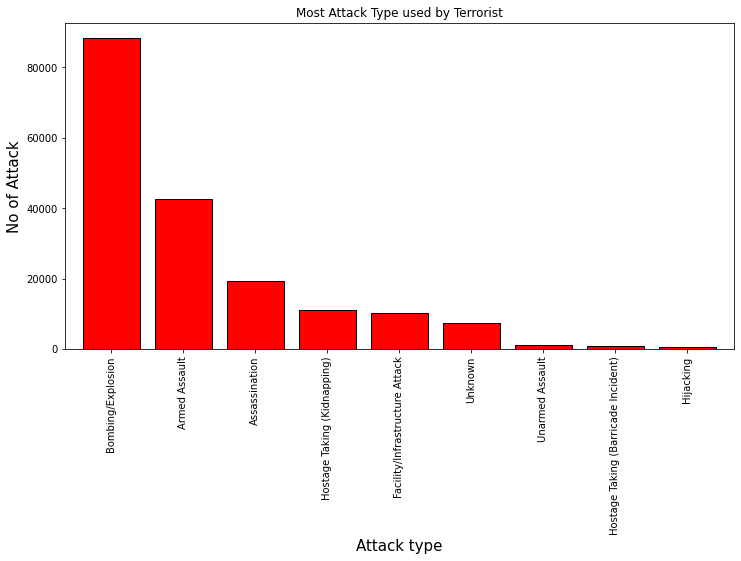

In [18]:
axplt=terror_df.AttackType.value_counts().plot.bar(width=0.8,linewidth=1,
    edgecolor='black',
    figsize = (12,6),
    fontsize = 10,
    color='red'
    
)
axplt.set_title("Most Attack Type used by Terrorist")
axplt.set_xlabel('Attack type', fontsize = 15)
axplt.set_ylabel('No of Attack', fontsize = 15)


Text(0, 0.5, 'No of Attack')

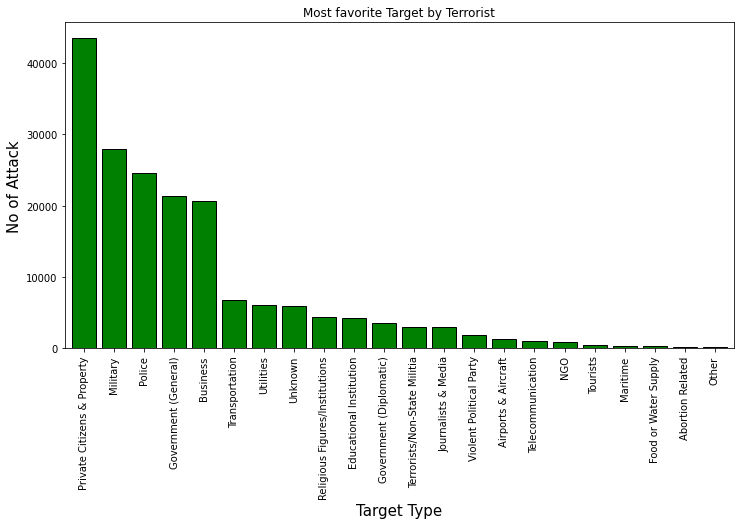

In [19]:
axplt=terror_df.Target_type.value_counts().plot.bar(width=0.8,linewidth=1,
    edgecolor='black',
    figsize = (12,6),
    fontsize = 10,
    color='green'
)
axplt.set_title("Most favorite Target by Terrorist")
axplt.set_xlabel('Target Type', fontsize = 15)
axplt.set_ylabel('No of Attack', fontsize = 15)

Text(0, 0.5, 'No of Attack')

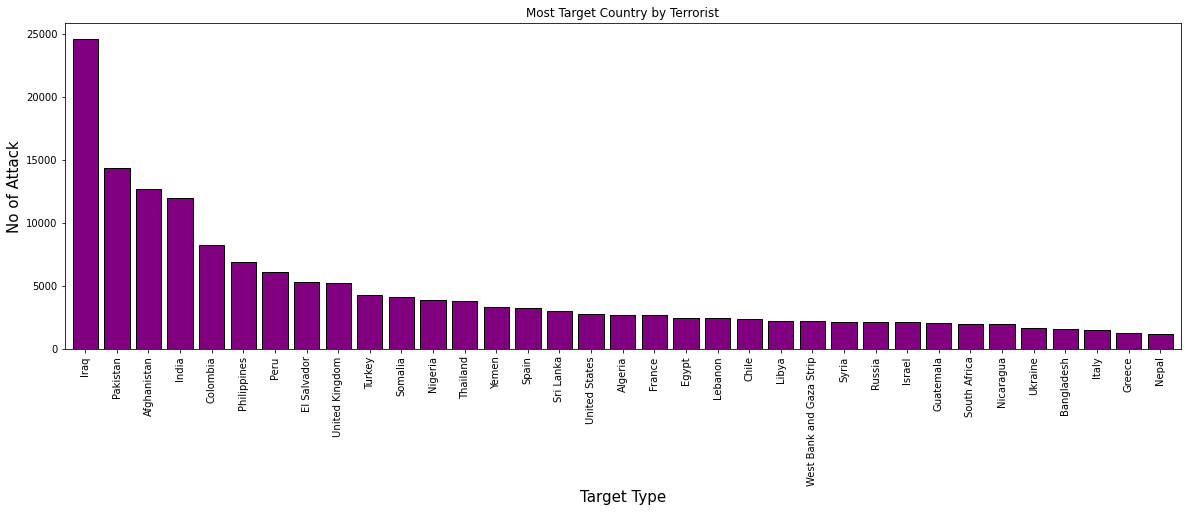

In [20]:
axplt=terror_df.Country.value_counts().iloc[0:35].plot.bar(width=0.8,linewidth=1,
    edgecolor='black',
    figsize = (20,6),
    fontsize = 10,
    color='purple'
)
axplt.set_title("Most Target Country by Terrorist")
axplt.set_xlabel('Target Type', fontsize = 15)
axplt.set_ylabel('No of Attack', fontsize = 15)

Text(0, 0.5, 'No of Attack')

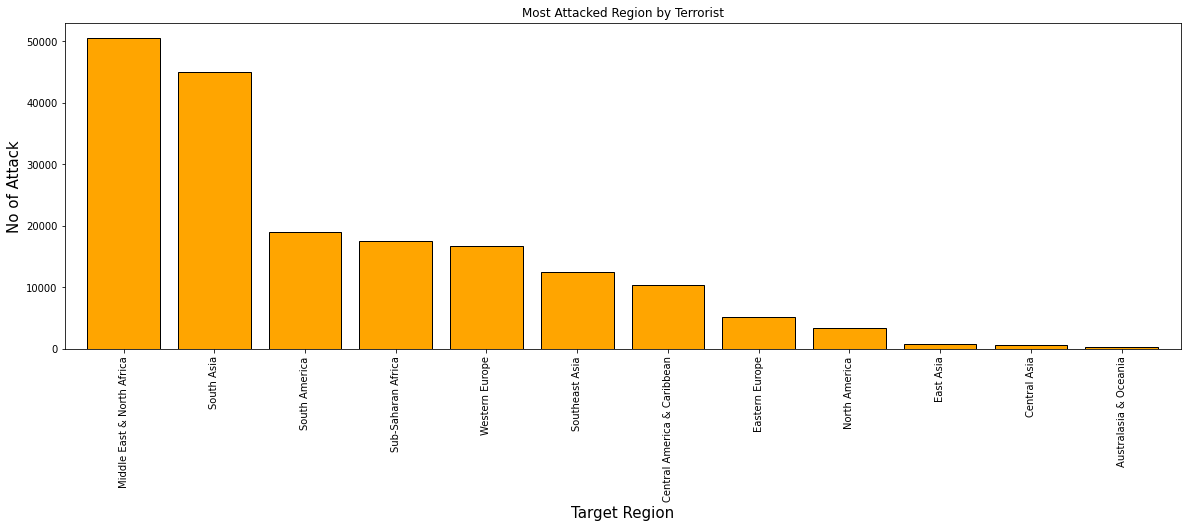

In [21]:
axplt=terror_df.Region.value_counts().plot.bar(width=0.8,linewidth=1,
    edgecolor='black',
    figsize = (20,6),
    fontsize = 10,
    color='orange'
)
axplt.set_title("Most Attacked Region by Terrorist")
axplt.set_xlabel('Target Region', fontsize = 15)
axplt.set_ylabel('No of Attack', fontsize = 15)

Text(0, 0.5, 'No of Attack')

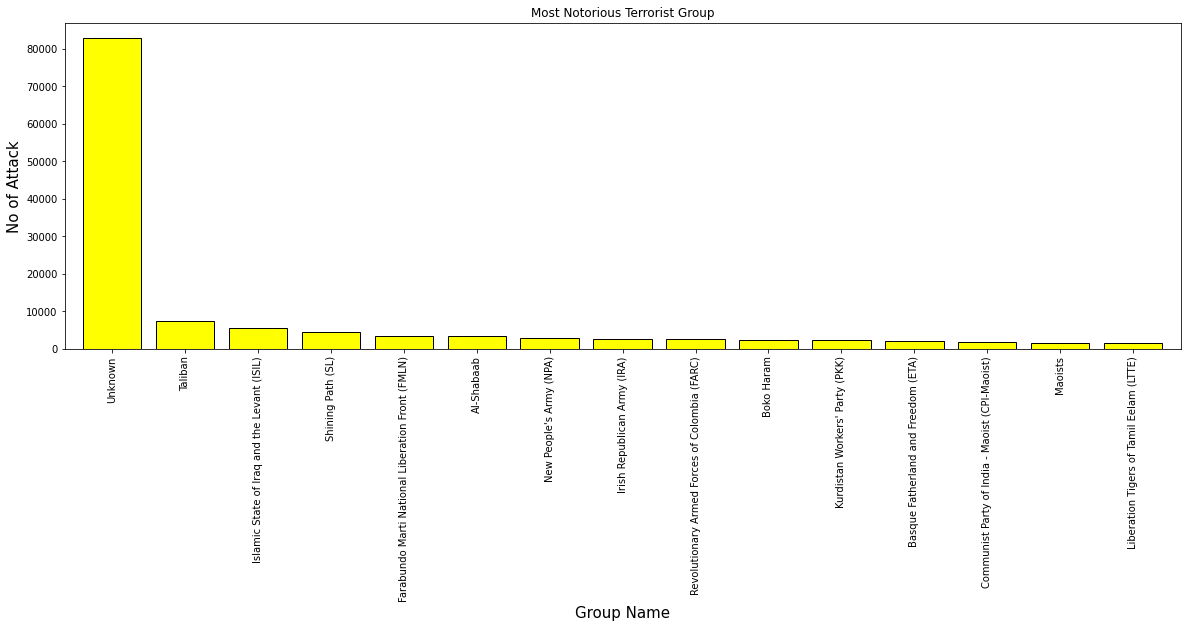

In [22]:
axplt=terror_df.Group.value_counts().iloc[0:15].plot.bar(width=0.8,linewidth=1,
    edgecolor='black',
    figsize = (20,6),
    fontsize = 10,
    color='yellow'
)
axplt.set_title("Most Notorious Terrorist Group")
axplt.set_xlabel('Group Name', fontsize = 15)
axplt.set_ylabel('No of Attack', fontsize = 15)

In [23]:
terror_df['casualities']=terror_df['Killed']+terror_df['Wounded']

In [24]:
terror_df.head()


,eventid,Year,Month,Day,extended,country,Country,region,Region,provstate,city,latitude,longitude,specificity,vicinity,Summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,AttackType,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,natlty1,natlty1_txt,Group,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,casualities
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,0.0,NaN,NaN,PGIS,0,0,0,0,1.0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,NaN,NaN,13,Unknown,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,1.0,NaN,NaN,PGIS,0,1,1,1,0.0
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1,1.0
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1,NaN


Text(0, 0.5, 'No of Citizen Loss')

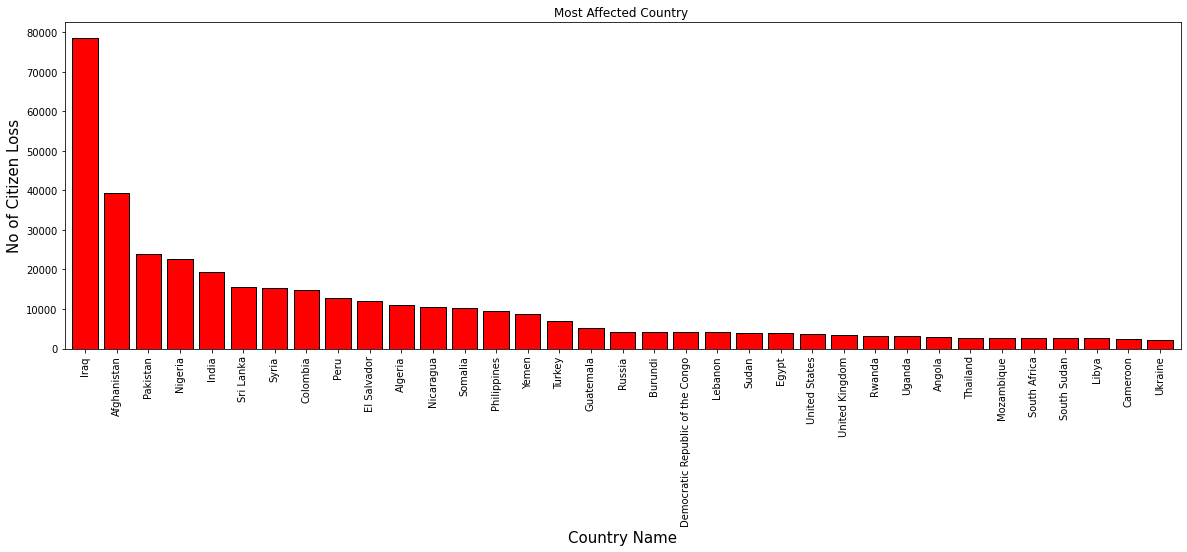

In [25]:
axplt=terror_df.groupby('Country')['Killed'].sum().sort_values(ascending=False).iloc[0:35].plot.bar(width=0.8,linewidth=1,
    edgecolor='black',
    figsize = (20,6),
    fontsize = 10,
    color='red'
)
axplt.set_title("Most Affected Country ")
axplt.set_xlabel('Country Name', fontsize = 15)
axplt.set_ylabel('No of Citizen Loss', fontsize = 15)

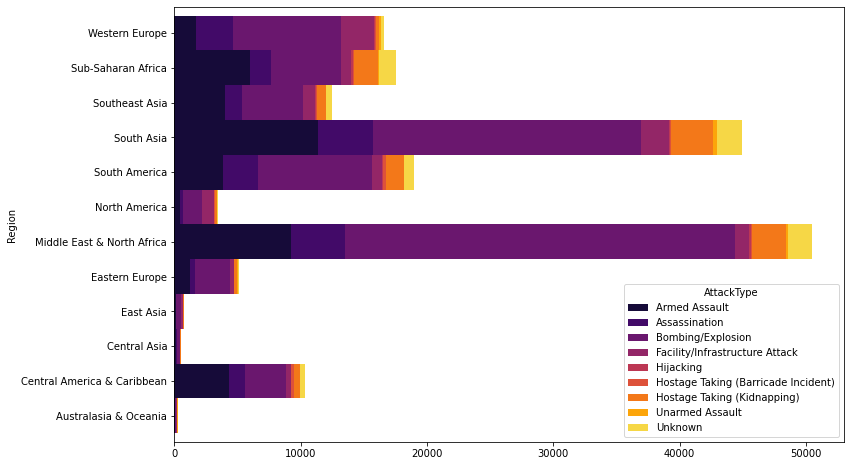

In [26]:
# This plot show us Type of attack Trend in region
pd.crosstab(terror_df.Region,terror_df.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('inferno',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [45]:
terror_df

,eventid,Year,Month,Day,extended,country,Country,region,Region,provstate,city,latitude,longitude,specificity,vicinity,Summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,AttackType,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,natlty1,natlty1_txt,Group,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,casualities
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,0.0,NaN,NaN,PGIS,0,0,0,0,1.0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,NaN,NaN,13,Unknown,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,1.0,NaN,NaN,PGIS,0,1,1,1,0.0
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1,1.0
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,0.0,1,0,2,Armed Assault,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,Al-Shabaab,0.0,0,-99.0,0.0,1.0,5,Firearms,5.0,Unknown Gun Type,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,0.0,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...",START Primary Collection,0,0,0,0,3.0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,0.0,1,0,3,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,Muslim extremists,0.0,0,-99.0,0.0,0.0,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,0.0,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...",START Primary Collection,-9,-9,1,1,9.0
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,0.

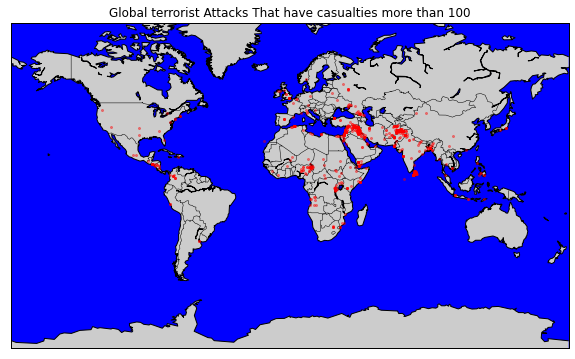

In [27]:
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
lat_=list(terror_df[terror_df['casualities']>100].latitude)
long_=list(terror_df[terror_df['casualities']>100].longitude)
x_,y_=m3(long_,lat_)
m3.plot(x_, y_,'go',markersize=2,color = 'r',alpha=0.4)
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color='blue')
m3.drawmapboundary(fill_color='blue')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.title('Global terrorist Attacks That have casualties more than 100')
plt.show()


Analysis of india


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


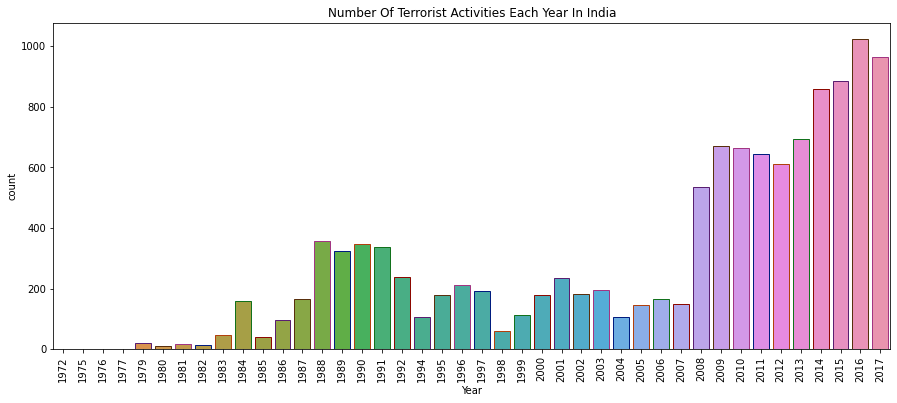

In [28]:
# Analysis of india

india_terror_df=terror_df[terror_df['Country']== 'India']
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=india_terror_df,edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year In India')
plt.show()

In [46]:
india_terror_df

,eventid,Year,Month,Day,extended,country,Country,region,Region,provstate,city,latitude,longitude,specificity,vicinity,Summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,AttackType,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,natlty1,natlty1_txt,Group,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,casualities
1186,197202220004,1972,2,22,0,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,1,1,1,0.0,0.0,1,0,4,Hijacking,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Lufthansa,B-747,75.0,Germany,Palestinians,0.0,0,5.0,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,NaN,NaN,Hijacking DB,1,1,1,1,0.0
2764,197501190004,1975,1,2,0,92,India,6,South Asia,Bihar,Samastipur,25.863042,85.781004,1.0,0,"1/2/1975: The Indian Railway Minister, Lalit N...",1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),18.0,"Government Personnel (excluding police, military)",Railway Minister of India and legislator,Lalit Narayan Mishra and a legislator,92.0,India,Ananda Marga,1.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,No additional information available.,4.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,"""Leaders of India Irate at Killing: Death of A...","Dhananjay Mahapatra, ""SC: Why has LN Mishra mu...",UMD Encyclopedia of World Terrorism 2012,0,0,0,0,4.0
3857,197605260001,1976,5,26,0,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,6,Airports & Aircraft,44.0,Airport,NaN,New Delhi airport,92.0,India,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,0,-9,0.0
5327,197709280004,1977,9,28,0,92,India,6,South Asia,Maharashtra,Bombay,19.075984,72.877656,1.0,0,NaN,1,1,1,0.0,0.0,1,0,4,Hijacking,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Japan Airlines,DC-8,101.0,Japan,Japanese Red Army (JRA),0.0,0,5.0,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,Firearm; Grenades,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,NaN,NaN,Hijacking DB,1,1,1,1,0.0
7337,197901130004,1979,1,13,0,92,India,6,South Asia,Assam,Unknown,26.200605,92.937574,4.0,0,NaN,1,1,1,-9.0,0.0,1,0,2,Armed Assault,3,Police,23.0,Police Patrol (including vehicles and convoys),Police,patrol,92.0,India,Naga People,0.0,0,NaN,NaN,NaN,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,Automatic firearm,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181663,201712300021,2017,12,30,0,92,India,6,South Asia,Kerala,Koothuparamba,11.831902,75.565432,1.0,0,12/30/2017: Assailants threw an explosive devi...,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,3,Police,22.0,"Police Building (headquarters, station, school)",Indian Police Service (IPS),Koothuparamba Police Station,92.0,India,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,17.0,Other Explosive Type,A crude bomb was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,"""Crude bomb explosion at two places in Kerala'...","""Bomb hurled at police station in Kannur,"" The...",START Primary Collection,-9,-9,0,-9,0.0
181665,201712300023,2017,12,30,0,92,India,6,South Asia,Chhattisgarh,Toylanka,18.802725,81.497666,1.0,0,12/30/2017: Assailants set fire to seven vehic...,1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,1,Business,12.0,Construction,Unknown,Road Construction Site,92.0,India,Communist Party of India - Maoist (CPI-Maoist),0.0,0,12.0,0.0,0.0,5,Firearms,5.0,Unknown Gun Type,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN,"""Maoists set ablaze seven vehicles in Dantewad...","""Explosives reco

In [29]:
india_terror_df.head()

,eventid,Year,Month,Day,extended,country,Country,region,Region,provstate,city,latitude,longitude,specificity,vicinity,Summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,AttackType,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,natlty1,natlty1_txt,Group,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,casualities
1186,197202220004,1972,2,22,0,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,1,1,1,0.0,0.0,1,0,4,Hijacking,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Lufthansa,B-747,75.0,Germany,Palestinians,0.0,0,5.0,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,NaN,NaN,Hijacking DB,1,1,1,1,0.0
2764,197501190004,1975,1,2,0,92,India,6,South Asia,Bihar,Samastipur,25.863042,85.781004,1.0,0,"1/2/1975: The Indian Railway Minister, Lalit N...",1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),18.0,"Government Personnel (excluding police, military)",Railway Minister of India and legislator,Lalit Narayan Mishra and a legislator,92.0,India,Ananda Marga,1.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,No additional information available.,4.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,"""Leaders of India Irate at Killing: Death of A...","Dhananjay Mahapatra, ""SC: Why has LN Mishra mu...",UMD Encyclopedia of World Terrorism 2012,0,0,0,0,4.0
3857,197605260001,1976,5,26,0,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,6,Airports & Aircraft,44.0,Airport,NaN,New Delhi airport,92.0,India,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,0,-9,0.0
5327,197709280004,1977,9,28,0,92,India,6,South Asia,Maharashtra,Bombay,19.075984,72.877656,1.0,0,NaN,1,1,1,0.0,0.0,1,0,4,Hijacking,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Japan Airlines,DC-8,101.0,Japan,Japanese Red Army (JRA),0.0,0,5.0,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,Firearm; Grenades,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,NaN,NaN,Hijacking DB,1,1,1,1,0.0
7337,197901130004,1979,1,13,0,92,India,6,South Asia,Assam,Unknown,26.200605,92.937574,4.0,0,NaN,1,1,1,-9.0,0.0,1,0,2,Armed Assault,3,Police,23.0,Police Patrol (including vehicles and convoys),Police,patrol,92.0,India,Naga People,0.0,0,NaN,NaN,NaN,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,Automatic firearm,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,0,0,0,0,NaN


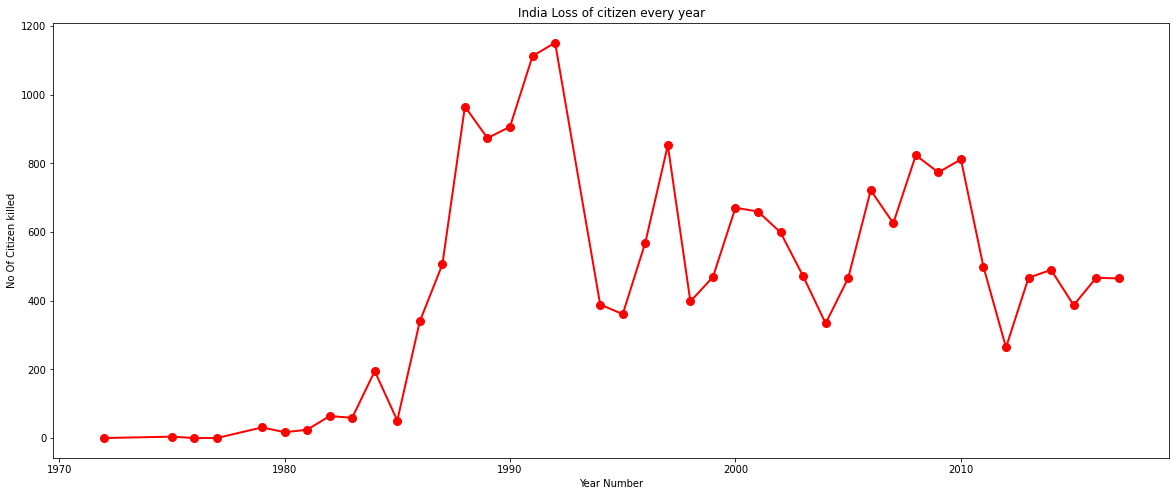

In [43]:
ind_kill_df=india_terror_df.groupby('Year').agg({'Killed':sum}).reset_index()
ind_kill_df

x_label=ind_kill_df['Year']                                                           
y_label=ind_kill_df['Killed']                                                                          

plt.plot(x_label,y_label,'ro-', linewidth=2, markersize=8)                                  
plt.title('India Loss of citizen every year',{'fontsize':12,'fontweight':30})
plt.ylabel('No Of Citizen killed',{'fontsize':10,'fontweight':15})
plt.xlabel('Year Number',{'fontsize':10,'fontweight':15})
plt.rcParams['figure.figsize'] = (20,8)


In [31]:
india_terror_df.loc[india_terror_df['provstate'] == 'Orissa', 'provstate'] ='Odisha'


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Text(0, 0.5, 'No Attack happened')

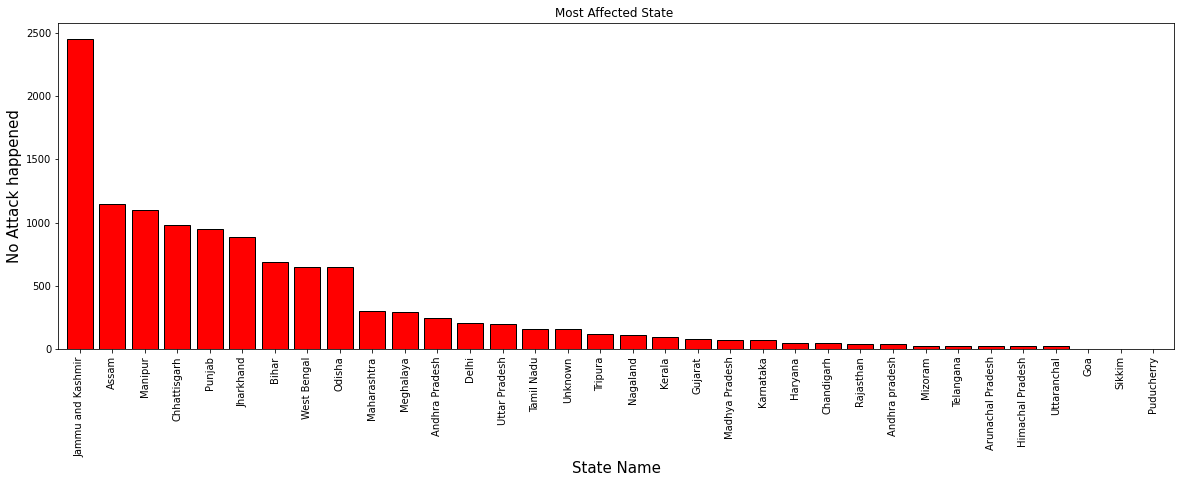

In [32]:
axplt=india_terror_df['provstate'].value_counts().plot.bar(width=0.8,linewidth=1,
    edgecolor='black',
    figsize = (20,6),
    fontsize = 10,
    color='red'
)
axplt.set_title("Most Affected State ")
axplt.set_xlabel('State Name', fontsize = 15)
axplt.set_ylabel('No Attack happened', fontsize = 15)

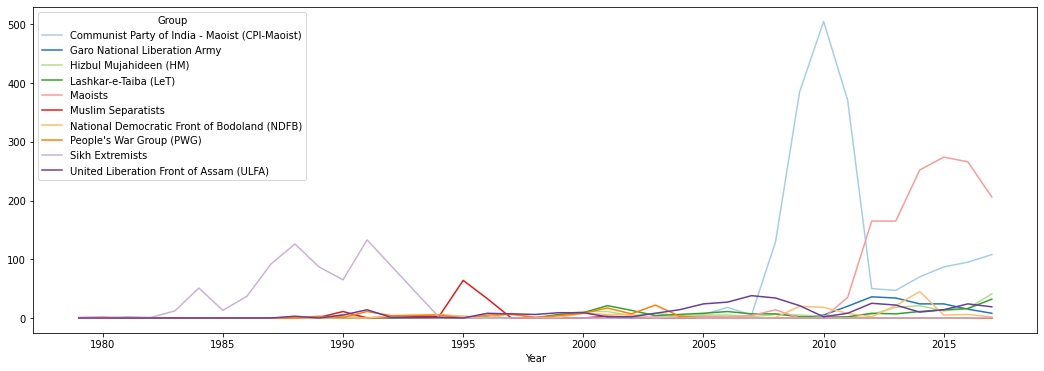

In [33]:
# Active group during year
top_groups10=india_terror_df[india_terror_df['Group'].isin(india_terror_df['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

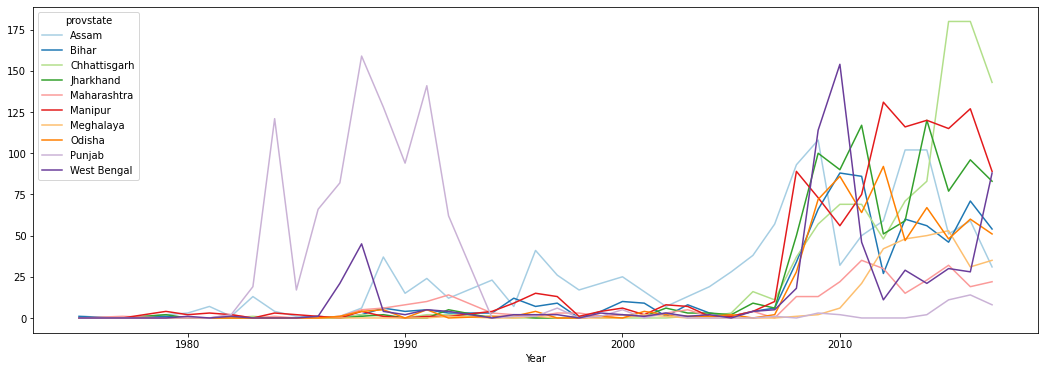

In [34]:
# top attacked state during year
top_groups10=india_terror_df[india_terror_df['provstate'].isin(india_terror_df['provstate'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.provstate).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

Text(0, 0.5, 'No of Attack')

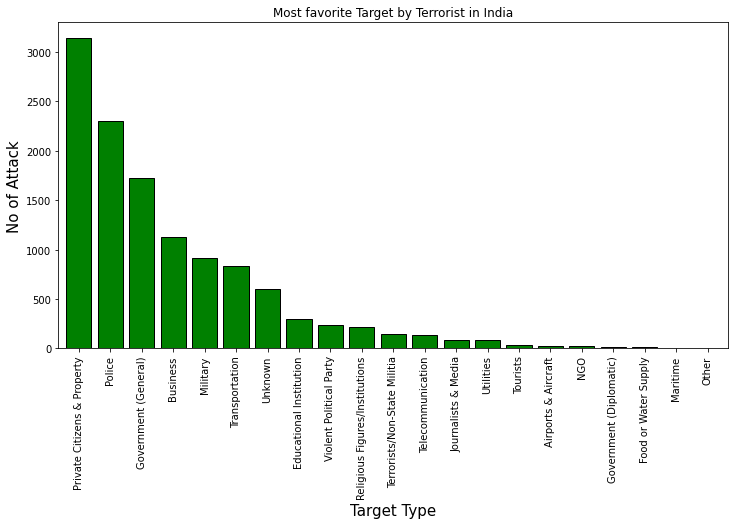

In [35]:
axplt=india_terror_df.Target_type.value_counts().plot.bar(width=0.8,linewidth=1,
    edgecolor='black',
    figsize = (12,6),
    fontsize = 10,
    color='green'
)
axplt.set_title("Most favorite Target by Terrorist in India")
axplt.set_xlabel('Target Type', fontsize = 15)
axplt.set_ylabel('No of Attack', fontsize = 15)

Text(0, 0.5, 'No of attack')

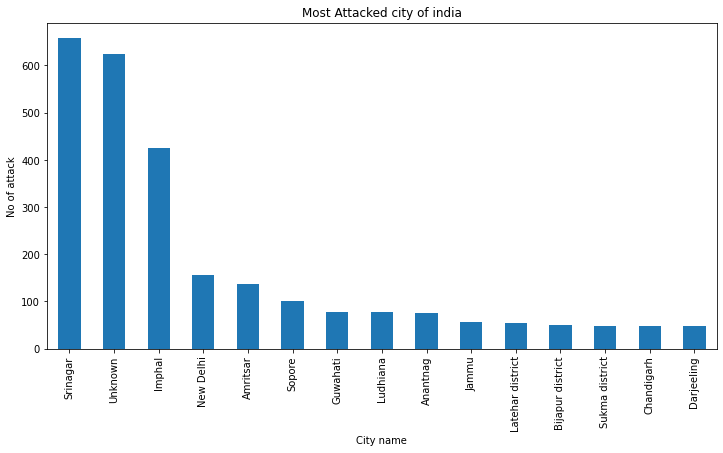

In [36]:
plt_cities=india_terror_df['city'].value_counts().iloc[0:15].plot.bar(figsize = (12,6),
    fontsize = 10)
plt_cities.set_title('Most Attacked city of india')
plt_cities.set_xlabel('City name')
plt_cities.set_ylabel('No of attack')

Text(0, 0.5, 'No Of Casualties')

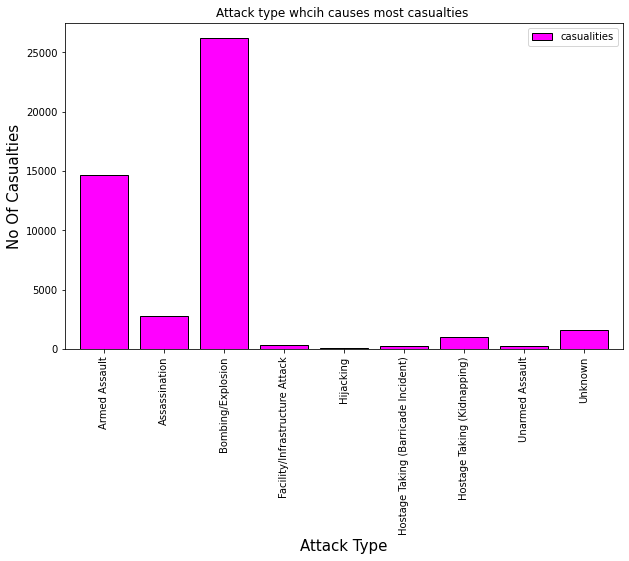

In [37]:
assult=india_terror_df.groupby('AttackType').agg({'casualities':sum}).plot.bar(width=0.8,linewidth=1,
    edgecolor='black',
    figsize = (10,6),
    fontsize = 10,
    color='magenta'
)
assult.set_title("Attack type whcih causes most casualties ")
assult.set_xlabel('Attack Type', fontsize = 15)
assult.set_ylabel('No Of Casualties', fontsize = 15)

In [38]:
india_terror_df.head()

,eventid,Year,Month,Day,extended,country,Country,region,Region,provstate,city,latitude,longitude,specificity,vicinity,Summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,AttackType,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,natlty1,natlty1_txt,Group,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,casualities
1186,197202220004,1972,2,22,0,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,1,1,1,0.0,0.0,1,0,4,Hijacking,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Lufthansa,B-747,75.0,Germany,Palestinians,0.0,0,5.0,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,NaN,NaN,Hijacking DB,1,1,1,1,0.0
2764,197501190004,1975,1,2,0,92,India,6,South Asia,Bihar,Samastipur,25.863042,85.781004,1.0,0,"1/2/1975: The Indian Railway Minister, Lalit N...",1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),18.0,"Government Personnel (excluding police, military)",Railway Minister of India and legislator,Lalit Narayan Mishra and a legislator,92.0,India,Ananda Marga,1.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,No additional information available.,4.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,"""Leaders of India Irate at Killing: Death of A...","Dhananjay Mahapatra, ""SC: Why has LN Mishra mu...",UMD Encyclopedia of World Terrorism 2012,0,0,0,0,4.0
3857,197605260001,1976,5,26,0,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,6,Airports & Aircraft,44.0,Airport,NaN,New Delhi airport,92.0,India,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,0,-9,0.0
5327,197709280004,1977,9,28,0,92,India,6,South Asia,Maharashtra,Bombay,19.075984,72.877656,1.0,0,NaN,1,1,1,0.0,0.0,1,0,4,Hijacking,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Japan Airlines,DC-8,101.0,Japan,Japanese Red Army (JRA),0.0,0,5.0,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,Firearm; Grenades,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,NaN,NaN,Hijacking DB,1,1,1,1,0.0
7337,197901130004,1979,1,13,0,92,India,6,South Asia,Assam,Unknown,26.200605,92.937574,4.0,0,NaN,1,1,1,-9.0,0.0,1,0,2,Armed Assault,3,Police,23.0,Police Patrol (including vehicles and convoys),Police,patrol,92.0,India,Naga People,0.0,0,NaN,NaN,NaN,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,Automatic firearm,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,0,0,0,0,NaN


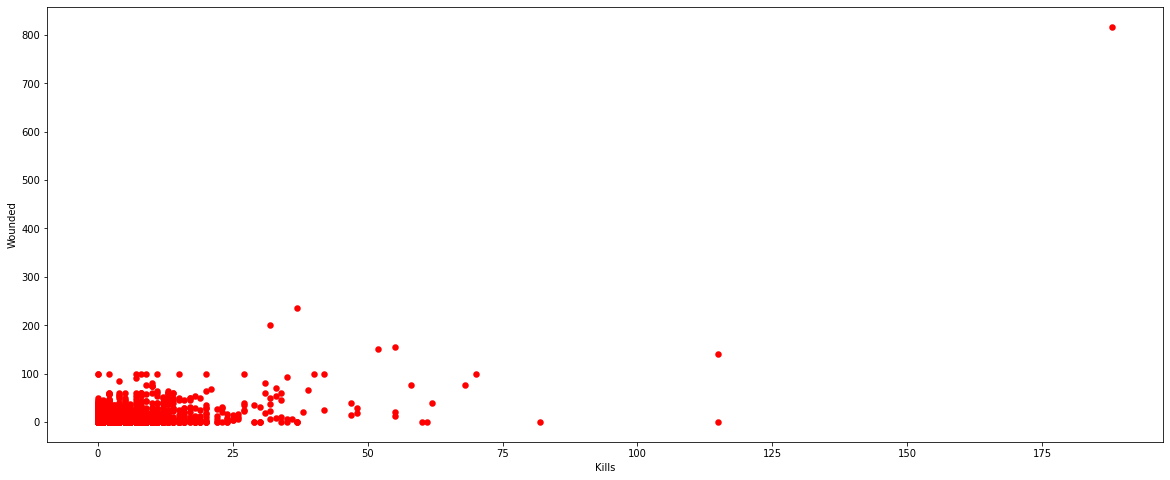

In [39]:
fig=plt.figure()
kills=india_terror_df['Killed'].tolist()
wounded=india_terror_df['Wounded'].tolist()

plt.scatter(kills, wounded,c ="red",linewidths = 2,s =20) 
plt.xlabel("Kills") 
plt.ylabel("Wounded") 
plt.show()

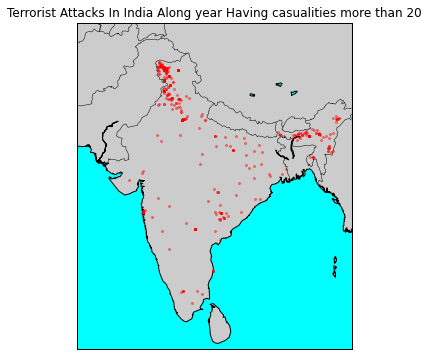

In [40]:
m5 = Basemap(projection='lcc',resolution='l',llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)


lat_=list(india_terror_df[india_terror_df['casualities']>20].latitude)
long_=list(india_terror_df[india_terror_df['casualities']>20].longitude)
x_,y_=m5(long_,lat_)
m5.plot(x_, y_,'go',markersize=2,color = 'r',alpha=0.4)


m5.drawcoastlines()
m5.drawcountries()
m5.fillcontinents(lake_color='aqua')
m5.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(20,6)
plt.title('Terrorist Attacks In India Along year Having casualities more than 20')

plt.show()

In [41]:
india_terror_df.head()

,eventid,Year,Month,Day,extended,country,Country,region,Region,provstate,city,latitude,longitude,specificity,vicinity,Summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,AttackType,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,natlty1,natlty1_txt,Group,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,casualities
1186,197202220004,1972,2,22,0,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,1,1,1,0.0,0.0,1,0,4,Hijacking,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Lufthansa,B-747,75.0,Germany,Palestinians,0.0,0,5.0,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,NaN,NaN,Hijacking DB,1,1,1,1,0.0
2764,197501190004,1975,1,2,0,92,India,6,South Asia,Bihar,Samastipur,25.863042,85.781004,1.0,0,"1/2/1975: The Indian Railway Minister, Lalit N...",1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),18.0,"Government Personnel (excluding police, military)",Railway Minister of India and legislator,Lalit Narayan Mishra and a legislator,92.0,India,Ananda Marga,1.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,No additional information available.,4.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,"""Leaders of India Irate at Killing: Death of A...","Dhananjay Mahapatra, ""SC: Why has LN Mishra mu...",UMD Encyclopedia of World Terrorism 2012,0,0,0,0,4.0
3857,197605260001,1976,5,26,0,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,6,Airports & Aircraft,44.0,Airport,NaN,New Delhi airport,92.0,India,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,0,-9,0.0
5327,197709280004,1977,9,28,0,92,India,6,South Asia,Maharashtra,Bombay,19.075984,72.877656,1.0,0,NaN,1,1,1,0.0,0.0,1,0,4,Hijacking,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Japan Airlines,DC-8,101.0,Japan,Japanese Red Army (JRA),0.0,0,5.0,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,Firearm; Grenades,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,NaN,NaN,Hijacking DB,1,1,1,1,0.0
7337,197901130004,1979,1,13,0,92,India,6,South Asia,Assam,Unknown,26.200605,92.937574,4.0,0,NaN,1,1,1,-9.0,0.0,1,0,2,Armed Assault,3,Police,23.0,Police Patrol (including vehicles and convoys),Police,patrol,92.0,India,Naga People,0.0,0,NaN,NaN,NaN,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,Automatic firearm,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,0,0,0,0,NaN


In [42]:
class CountryInfo:
  def __init__(self,country='India',year=1970,month=1):
    self.country=country
    self.year=year
    self.month=month
  
  def Plotgraph(self):
    self.country_df=terror_df[terror_df['Country']==self.country ]
    plt.subplots(figsize=(10,6))
    sns.countplot('Year',data=self.country_df,edgecolor=sns.color_palette('dark',7))
    plt.xticks(rotation=90)
    plt.title(f'Number Of Terrorist Activities Each Year In {self.country}')
    plt.show()

    print("Show Sucees and fail % of every attack")
    count=self.country_df.success.value_counts()
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.pie(count, labels = ['Success','Fail'],autopct='%1.2f%%')
    plt.show()

    print("This show ")
    axplt=self.country_df['provstate'].value_counts().plot.bar(width=0.8,linewidth=1,
    edgecolor='black',
    figsize = (10,6),
    fontsize = 10,
    color='red')
    axplt.set_title("Most Affected State ")
    axplt.set_xlabel('State Name', fontsize = 15)
    axplt.set_ylabel('No Attack happened', fontsize = 15)
  
    self.country_year_df=self.country_df[self.country_df['Year'] == self.year]

    print('\n')
    print("Show Sucees and fail % of every attack for ",self.year)

    count=self.country_df.success.value_counts()
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.pie(count, labels = ['Success','Fail'],autopct='%1.2f%%')
    plt.show()
    self.country_year_df.groupby('Month').agg({'success':sum}).plot(kind='bar')

  def ShowInfo(self):
    try:
      m5 = Basemap(projection='lcc',resolution='l',llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)


      lat_=list(india_terror_df[india_terror_df['casualities']>20].latitude)
      long_=list(india_terror_df[india_terror_df['casualities']>20].longitude)
      x_,y_=m5(long_,lat_)
      m5.plot(x_, y_,'go',markersize=2,color = 'r',alpha=0.4)


      m5.drawcoastlines()
      m5.drawcountries()
      m5.fillcontinents(lake_color='aqua')
      m5.drawmapboundary(fill_color='aqua')
      fig=plt.gcf()
      fig.set_size_inches(20,6)
      plt.title('Terrorist Attacks In India Along year Having casualities more than 20')

      plt.show()


      ind_kill_df=india_terror_df.groupby('Year').agg({'Killed':sum}).reset_index()
      ind_kill_df

      x_label=ind_kill_df['Year']                                                           
      y_label=ind_kill_df['Killed']                                                                          

      plt.plot(x_label,y_label,'ro-', linewidth=2, markersize=8)                                  
      plt.title('India Loss of citizen every year',{'fontsize':12,'fontweight':30})
      plt.ylabel('No Of Citizen killed',{'fontsize':10,'fontweight':15})
      plt.xlabel('Year Number',{'fontsize':10,'fontweight':15})
      plt.rcParams['figure.figsize'] = (20,8)

      m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
      lat_=list(terror_df[terror_df['casualities']>100].latitude)
      long_=list(terror_df[terror_df['casualities']>100].longitude)
      x_,y_=m3(long_,lat_)
      m3.plot(x_, y_,'go',markersize=2,color = 'r',alpha=0.4)
      m3.drawcoastlines()
      m3.drawcountries()
      m3.fillcontinents(lake_color='blue')
      m3.drawmapboundary(fill_color='blue')
      fig=plt.gcf()
      fig.set_size_inches(10,6)
      plt.title('Global terrorist Attacks That have casualties more than 100')
      plt.show()










 



SyntaxError: ignored

In [ ]:
 m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
      lat_=list(terror_df[terror_df['casualities']>100].latitude)
      long_=list(terror_df[terror_df['casualities']>100].longitude)
      x_,y_=m3(long_,lat_)
      m3.plot(x_, y_,'go',markersize=2,color = 'r',alpha=0.4)
      m3.drawcoastlines()
      m3.drawcountries()
      m3.fillcontinents(lake_color='blue')
      m3.drawmapboundary(fill_color='blue')
      fig=plt.gcf()
      fig.set_size_inches(10,6)
      plt.title('Global terrorist Attacks That have casualties more than 100')
      plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


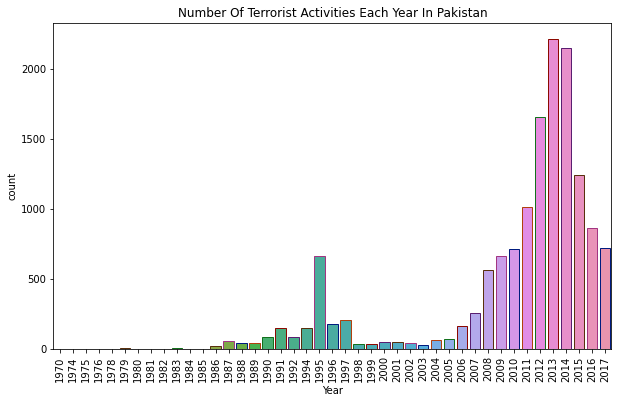

Show Sucees and fail % of every attack


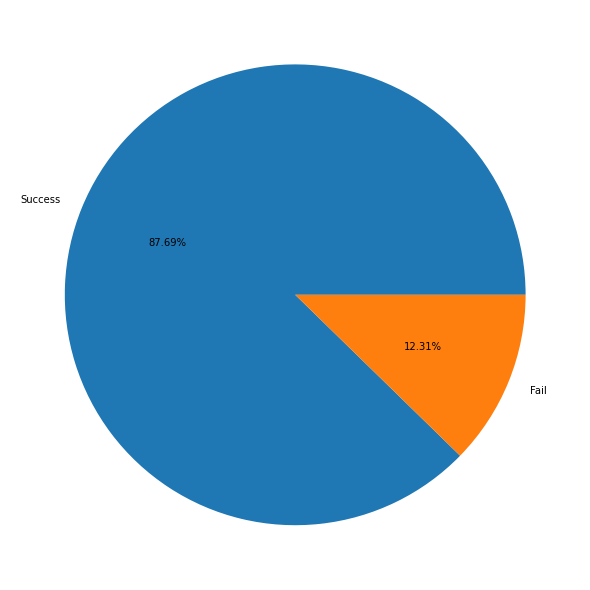

This show 


Show Sucees and fail % of every attack for  2011


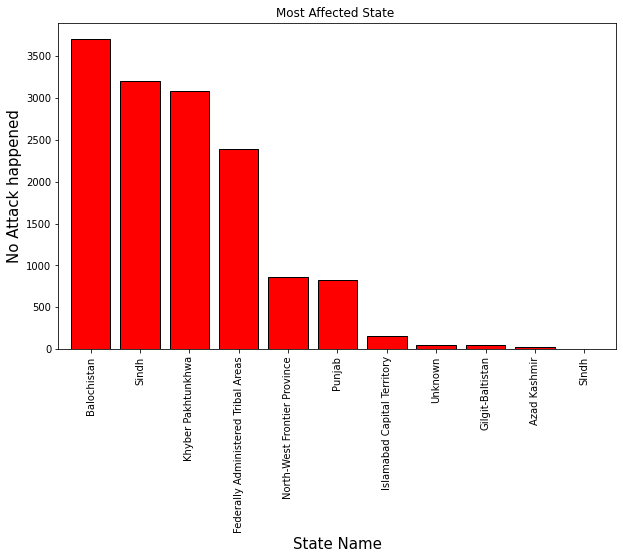

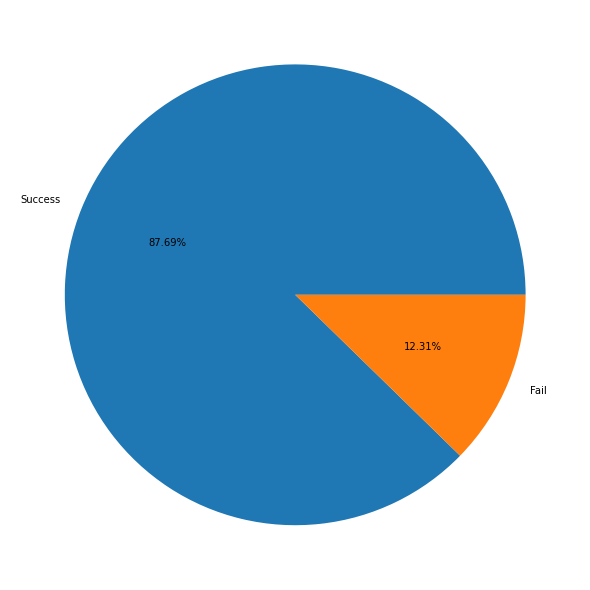

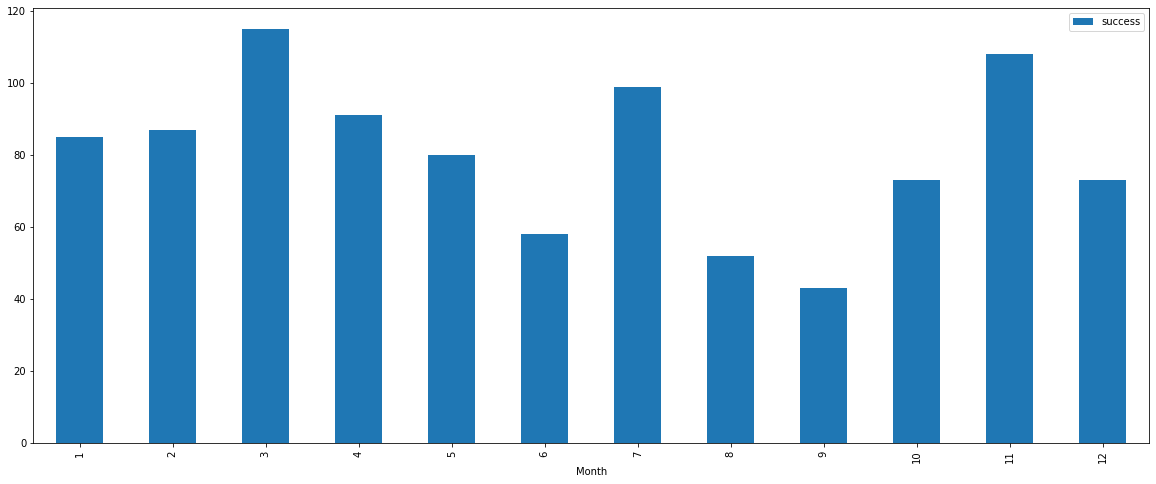

In [ ]:
con=CountryInfo(country='Pakistan',year=2011)
con.Plotgraph()

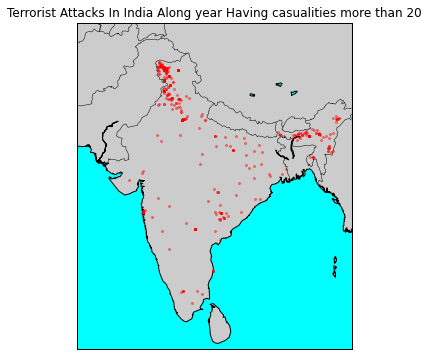

In [44]:
m5 = Basemap(projection='lcc',resolution='l',llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)


lat_=list(india_terror_df[india_terror_df['casualities']>20].latitude)
long_=list(india_terror_df[india_terror_df['casualities']>20].longitude)
x_,y_=m5(long_,lat_)
m5.plot(x_, y_,'go',markersize=2,color = 'r',alpha=0.4)


m5.drawcoastlines()
m5.drawcountries()
m5.fillcontinents(lake_color='aqua')
m5.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(20,6)
plt.title('Terrorist Attacks In India Along year Having casualities more than 20')

plt.show()

In [ ]:
m5 = Basemap(projection='lcc',resolution='l',llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)


lat_=list(india_terror_df[india_terror_df['casualities']>20].latitude)
long_=list(india_terror_df[india_terror_df['casualities']>20].longitude)
x_,y_=m5(long_,lat_)
m5.plot(x_, y_,'go',markersize=2,color = 'r',alpha=0.4)


m5.drawcoastlines()
m5.drawcountries()
m5.fillcontinents(lake_color='aqua')
m5.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(20,6)
plt.title('Terrorist Attacks In India Along year Having casualities more than 20')

plt.show()